In [24]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

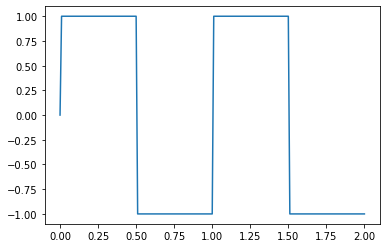

In [25]:
t = np.linspace(0,2,201) #two cycles, 100 points each
sqwave = np.sign(np.sin(2*np.pi*t)) #an actual square wave
fig, ax = plt.subplots()
ax.plot(t,sqwave)

In [26]:
@interact_manual
def fs(n=""):
    n = int(n)
    sq = np.zeros(len(t)) #preallocate the output array
    for h in np.arange(1,n,2):
        sq += (4/(np.pi*h))*np.sin(2*np.pi*h*t)
    fig, ax = plt.subplots()
    ax.plot(t,sq, t,sqwave)


interactive(children=(Text(value='', description='n'), Button(description='Run Interact', style=ButtonStyle())…

In [35]:
@interact_manual
def square_dfs(N=(0,40),M=(0,50)):
    n = range(-30,30)
    sqr = lambda x:1 if 0<=(x+M)%N<=2*M else  0
    c0 = [sqr(i) for i in n]
    fig, ax = plt.subplots()
    ax.stem(n,c0)
    k = np.array(range(-10,11))
    ak = lambda k: np.sin((2*np.pi*k/N)*(M+0.5))/(N*np.sin((2*np.pi*k)/(2*N))) if k%N!=0 else (2*M+1)/N

    C0 = [ak(i) for i in k]


    fig, ax = plt.subplots()
    ax.stem(k,C0)
    plt.xlabel("$ 2*\pi/N$")

interactive(children=(IntSlider(value=20, description='N', max=40), IntSlider(value=25, description='M', max=5…